##Import dan membagi data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = '/content/drive/MyDrive/Data Deep Learning/data_jeruk/train'
validation_dir = '/content/drive/MyDrive/Data Deep Learning/data_jeruk/validation'

train_matang = os.listdir(train_dir + '/matang/')
train_tidak_matang= os.listdir(train_dir + '/tidak_matang/')

##Preprocessing

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 197 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


##Pembuatan Model

In [5]:
input_shape = (224, 224, 3)
num_classes = 2

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:

model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/10
7/7 [==============================] - 129s 15s/step - loss: 0.8439 - accuracy: 0.4467 - val_loss: 0.6933 - val_accuracy: 0.4949
Epoch 2/10
7/7 [==============================] - 3s 453ms/step - loss: 0.6987 - accuracy: 0.4467 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 3/10
7/7 [==============================] - 3s 427ms/step - loss: 0.6930 - accuracy: 0.4975 - val_loss: 0.6936 - val_accuracy: 0.4949
Epoch 4/10
7/7 [==============================] - 3s 427ms/step - loss: 0.6947 - accuracy: 0.4924 - val_loss: 0.6934 - val_accuracy: 0.4949
Epoch 5/10
7/7 [==============================] - 3s 456ms/step - loss: 0.6934 - accuracy: 0.4924 - val_loss: 0.6932 - val_accuracy: 0.4949
Epoch 6/10
7/7 [==============================] - 3s 435ms/step - loss: 0.6939 - accuracy: 0.4619 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 7/10
7/7 [==============================] - 3s 428ms/step - loss: 0.6933 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.5051
Epoch 8/10
7/7 [====

In [7]:
model.save("jeruk_matang_model.h5")

##Testing

1/1 [==============================] - 0s 214ms/step


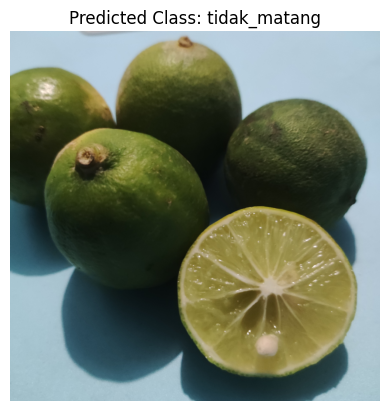

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras

model = keras.models.load_model('/content/jeruk_matang_model.h5')

input_image_path = '/content/IMG_20230526_212513.jpg' 
input_image = cv2.imread(input_image_path)
input_image = cv2.resize(input_image, (224, 224))
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, axis=0)

prediction = model.predict(input_image)
class_names = ['tidak_matang', 'matang'] 
predicted_class = np.argmax(prediction)
class_label = class_names[predicted_class]

plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Predicted Class: ' + class_label)
plt.show()
